<a href="https://colab.research.google.com/github/pegahahadian/Golang-Hello-World-/blob/master/Corona_vaccines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
from plotly.offline import iplot
from xgboost import XGBRegressor
from sklearn.svm import SVR
import scipy as sp
import os
import re
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, ElasticNet, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler, RobustScaler

In [4]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving country_vaccinations.csv to country_vaccinations.csv


In [5]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['country_vaccinations.csv'])) 
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,https://reliefweb.int/report/afghanistan/afgha...


In [6]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,7.917000e+03,7.238000e+03,5.238000e+03,6.622000e+03,1.308100e+04,7917.000000,7238.000000,5238.000000,13081.000000
mean,4.325183e+06,2.903580e+06,1.385595e+06,1.269432e+05,7.371984e+04,13.956761,10.306589,5.094706,2912.016436
std,1.734505e+07,1.063639e+07,5.917575e+06,4.726085e+05,3.239413e+05,21.901770,14.571712,9.572731,4821.636296
min,0.000000e+00,0.000000e+00,1.000000e+00,-1.831400e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.427500e+04,4.792475e+04,2.208700e+04,2.888250e+03,9.050000e+02,1.150000,1.052500,0.570000,340.000000
50%,3.763700e+05,3.023795e+05,1.569640e+05,1.530750e+04,5.882000e+03,5.510000,4.300000,2.070000,1432.000000
75%,1.760453e+06,1.276900e+06,6.295110e+05,6.026000e+04,2.758000e+04,17.370000,12.880000,5.430000,3690.000000
max,2.189476e+08,1.357910e+08,8.924578e+07,7.185000e+06,5.190143e+06,199.950000,106.590000,93.360000,118759.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13307 entries, 0 to 13306
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              13307 non-null  object 
 1   iso_code                             13307 non-null  object 
 2   date                                 13307 non-null  object 
 3   total_vaccinations                   7917 non-null   float64
 4   people_vaccinated                    7238 non-null   float64
 5   people_fully_vaccinated              5238 non-null   float64
 6   daily_vaccinations_raw               6622 non-null   float64
 7   daily_vaccinations                   13081 non-null  float64
 8   total_vaccinations_per_hundred       7917 non-null   float64
 9   people_vaccinated_per_hundred        7238 non-null   float64
 10  people_fully_vaccinated_per_hundred  5238 non-null   float64
 11  daily_vaccinations_per_milli

In [8]:
df.dtypes

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object

In [9]:
#converting date column datatype to date
df["date"]= pd.to_datetime(df.date)

In [10]:
df["Total_vaccinations(count)"]= df.groupby("country").total_vaccinations.tail(1)

In [11]:
#Top countries with most vaccinations
df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
United States           218947643.0
China                   211223000.0
India                   132754608.0
United Kingdom           44450252.0
England                  37238073.0
Brazil                   35024957.0
Germany                  24286909.0
Turkey                   20728975.0
France                   18284330.0
Indonesia                17920908.0
Russia                   17218313.0
Italy                    16316820.0
Mexico                   15477517.0
Spain                    13909964.0
Chile                    13722557.0
Canada                   11158636.0
Israel                   10379693.0
United Arab Emirates     10001241.0
Poland                    9806966.0
Morocco                   8914956.0
Name: Total_vaccinations(count), dtype: float64

Visualization


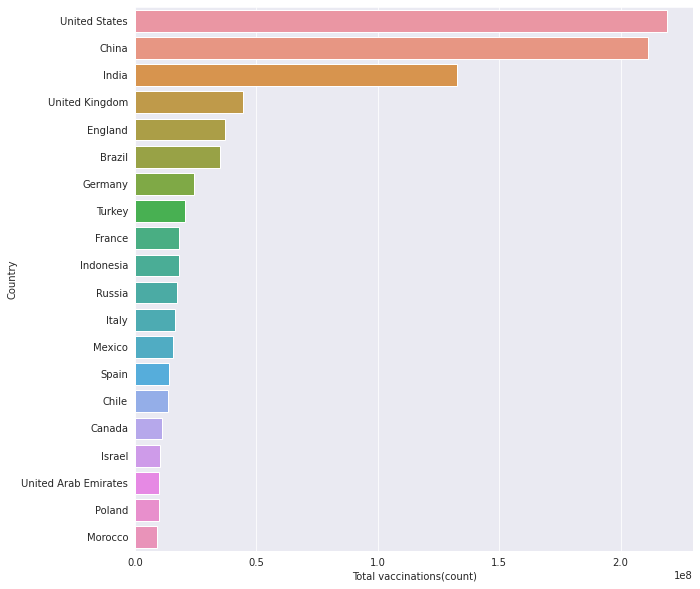

In [12]:
#barplot visualization of top countries with most vaccinations
x= df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(20)
sns.set_style("darkgrid")
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Total vaccinations(count)")
ax.set_ylabel("Country")
plt.show()

In [13]:
#Top countries with fully  vaccinated peoples
df["Full_vaccinations(count)"]= df.groupby("country").people_fully_vaccinated.tail(1)

df.groupby("country")["Full_vaccinations(count)"].mean().sort_values(ascending= False).head(20)

country
United States     89245776.0
India             19170339.0
United Kingdom    11192601.0
Brazil             9683990.0
England            9346865.0
Turkey             7932297.0
Indonesia          6488197.0
Russia             6430894.0
Chile              5873211.0
Germany            5790531.0
France             5019183.0
Israel             5005417.0
Mexico             4978670.0
Italy              4787119.0
Morocco            4207298.0
Spain              3768015.0
Poland             2495838.0
Bangladesh         1967975.0
Romania            1686583.0
Hungary            1490478.0
Name: Full_vaccinations(count), dtype: float64

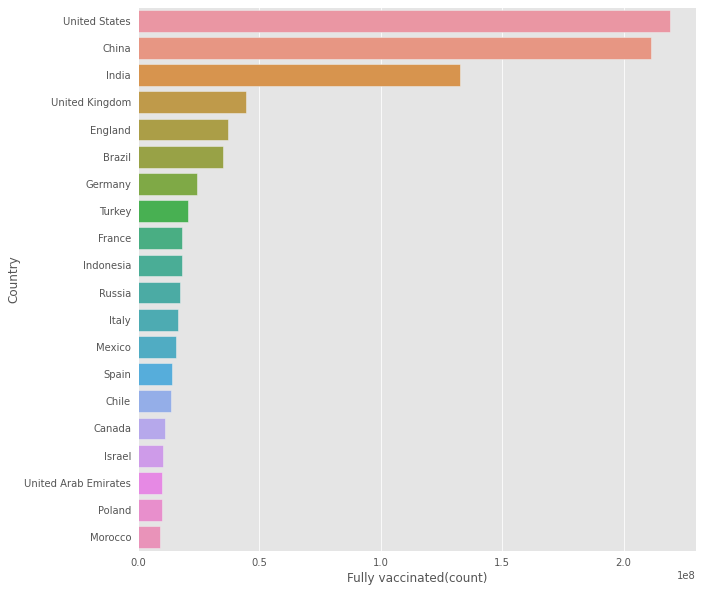

In [14]:
plt.style.use("ggplot")
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Fully vaccinated(count)")
ax.set_ylabel("Country")
plt.show()

In [15]:
#Vaccine types
x=df.vaccines.unique()
y= list(x)
for i in y: print(i)

Oxford/AstraZeneca
Pfizer/BioNTech, Sinovac
Sputnik V
Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Pfizer/BioNTech
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Sinovac
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
Oxford/AstraZeneca, Sinovac
Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac
Sinopharm/Beijing
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac
Sinopharm/Beijing, Sputnik V
Moderna, Pfizer/BioNTech
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac
Oxford/AstraZeneca, Sinopharm/Beijing
Moderna, Oxford/AstraZeneca
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Covaxin, Oxford/AstraZeneca
Oxford/AstraZeneca, Sputnik V
Pfizer/BioNTech, Sinopharm/Beijing
Oxford/AstraZeneca, Sinovac, Sputnik V
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
CanSino, Oxford/AstraZeneca, Pfizer/BioNTech

In [16]:
#most common vaccines
df.vaccines.value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          2701
Oxford/AstraZeneca                                                                    2221
Oxford/AstraZeneca, Pfizer/BioNTech                                                   1568
Pfizer/BioNTech                                                                       1333
Moderna, Pfizer/BioNTech                                                               534
Pfizer/BioNTech, Sinovac                                                               503
Oxford/AstraZeneca, Sinopharm/Beijing                                                  417
Sputnik V                                                                              371
Oxford/AstraZeneca, Sinovac                                                            362
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac                                           361
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V                      295

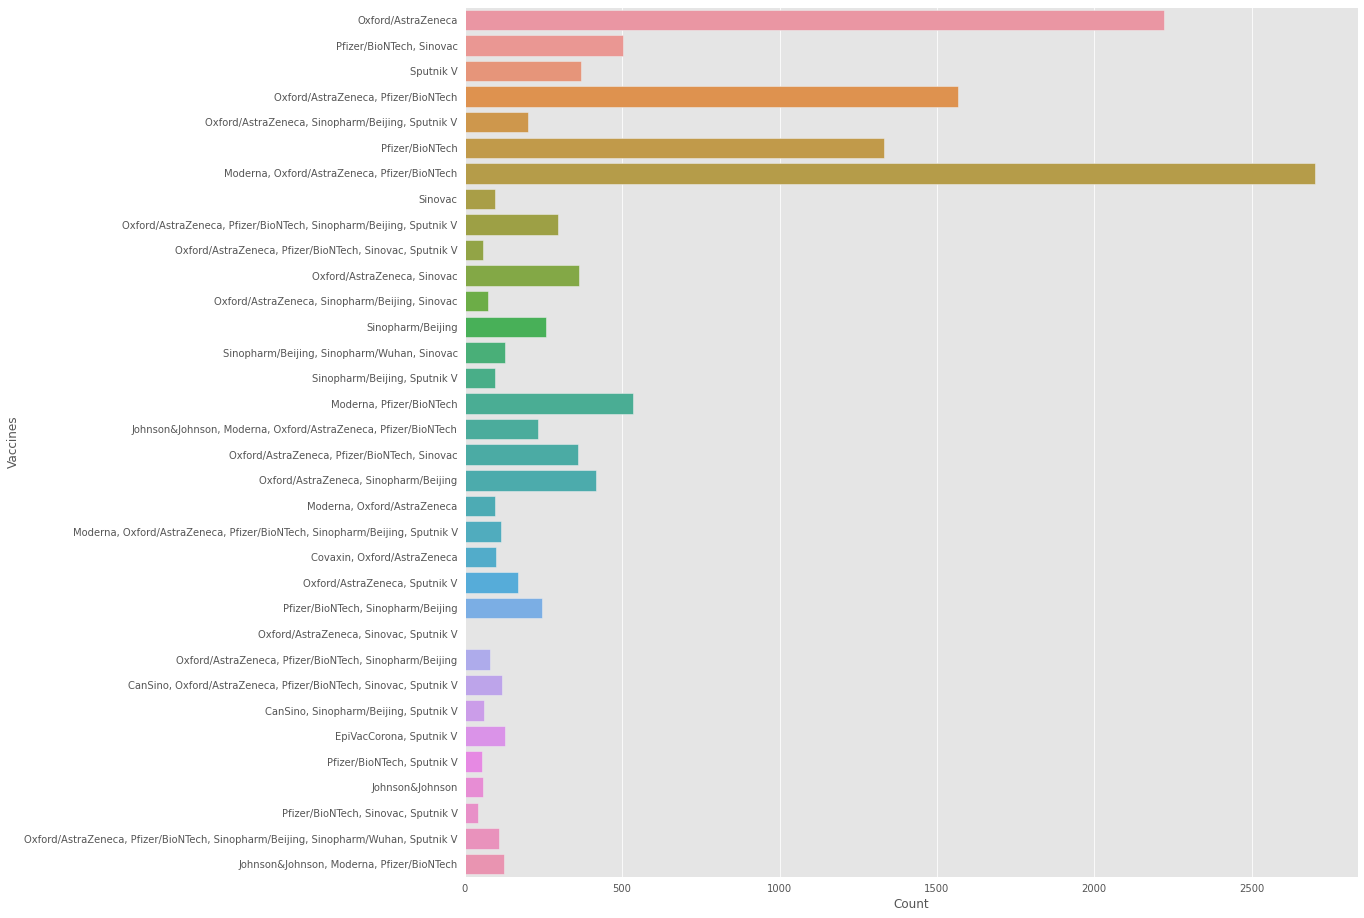

In [17]:
plt.figure(figsize=(16,16))
sns.countplot(y= "vaccines",data= df)
plt.ylabel("Vaccines")
plt.xlabel("Count")
plt.show()

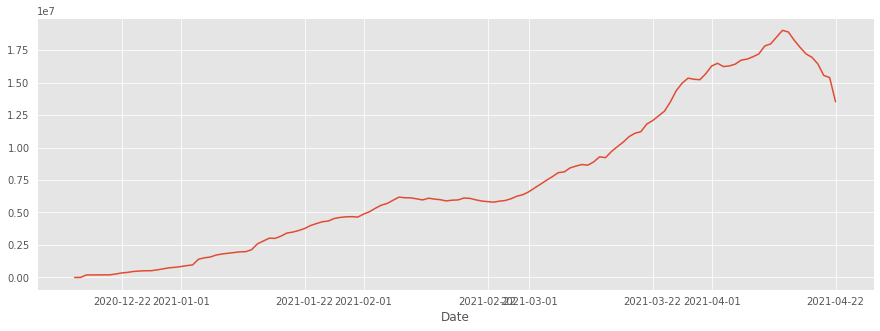

In [18]:
#daily vaccinations
x= df.groupby("date").daily_vaccinations.sum()
plt.style.use("ggplot")
plt.figure(figsize= (15,5))
sns.lineplot(x.index,x.values)
plt.xlabel("Date")
plt.show()

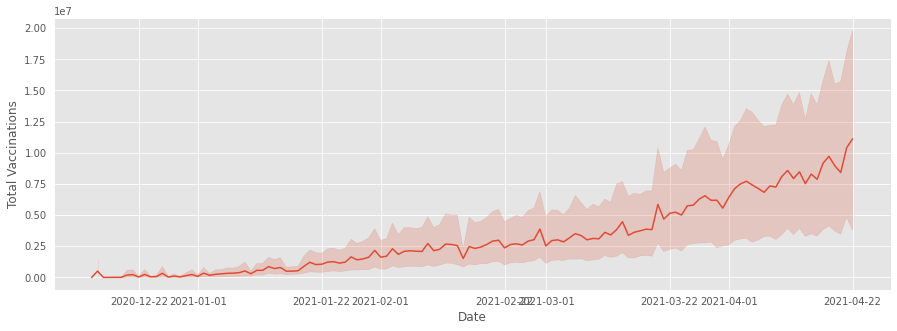

In [19]:
#total vaccinations
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations",data= df)
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.show()

In [20]:
#Countries with best daily average vaccinations
x= df.groupby("country").daily_vaccinations.mean().sort_values(ascending= False).head(20)
x

country
United States           1.714703e+06
China                   1.531383e+06
India                   1.307284e+06
United Kingdom          3.906675e+05
Brazil                  3.492419e+05
England                 3.275956e+05
Turkey                  2.112942e+05
Germany                 1.960244e+05
Indonesia               1.718412e+05
France                  1.499391e+05
Italy                   1.334595e+05
Russia                  1.272916e+05
Mexico                  1.213390e+05
Spain                   1.207105e+05
Chile                   1.127700e+05
Morocco                 1.071079e+05
Bangladesh              8.438999e+04
United Arab Emirates    8.399854e+04
Israel                  8.394167e+04
Canada                  7.973929e+04
Name: daily_vaccinations, dtype: float64

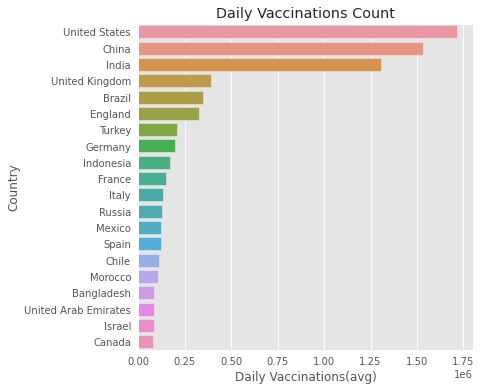

In [21]:
#daily vaccinations barplot
plt.figure(figsize= (6,6))
ax= sns.barplot(x.values,x.index)
ax.set_title("Daily Vaccinations Count")
ax.set_xlabel("Daily Vaccinations(avg)")
ax.set_ylabel("Country")
plt.show()

In [22]:
#vaccination per hundred top countries
df["Total_vaccinations_per_hundred"]= df.groupby("country").total_vaccinations_per_hundred.tail(1)

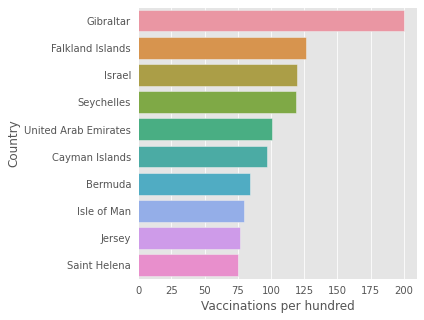

In [23]:
x= df.groupby("country")["Total_vaccinations_per_hundred"].mean().sort_values(ascending= False).head(10)
plt.figure(figsize= (5,5))
ax= sns.barplot(x.values,x.index)
ax.set_ylabel("Country")
ax.set_xlabel("Vaccinations per hundred")
plt.show()

In [24]:
#daily vaccinations per million top countries
df.groupby("country")["daily_vaccinations_per_million"].mean().sort_values(ascending= False).head(20)

country
Bhutan                      35506.222222
Falkland Islands            21459.424242
Gibraltar                   20177.058824
Nauru                       15507.000000
Curacao                     13350.083333
San Marino                  12590.075472
Seychelles                  11809.450000
Saint Helena                11408.723077
Israel                       9698.000000
United Arab Emirates         8492.925234
Bermuda                      8269.555556
Cayman Islands               8269.413793
Isle of Man                  8105.890110
Turks and Caicos Islands     8058.000000
Maldives                     7855.679487
Uruguay                      7628.518519
Jersey                       7596.214286
Guernsey                     6793.430233
Wales                        6643.083333
Malta                        6529.808511
Name: daily_vaccinations_per_million, dtype: float64

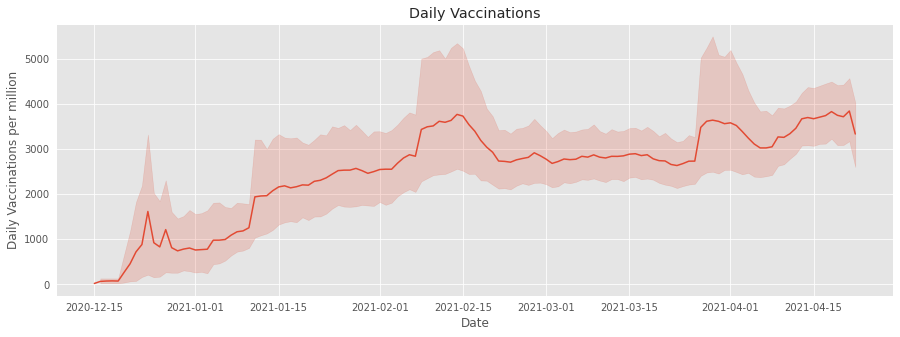

In [25]:
#daily vaccination per million 
plt.figure(figsize= (15,5))
plt.style.use("ggplot")
sns.lineplot(x= "date",y= "daily_vaccinations_per_million",data= df)
plt.title("Daily Vaccinations")
plt.ylabel("Daily Vaccinations per million")
plt.xlabel("Date")
plt.show()

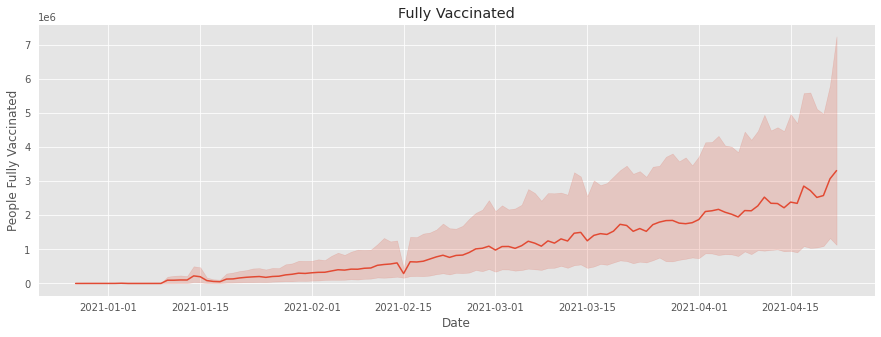

In [26]:
#people fully vaccinated
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_fully_vaccinated",data= df)
plt.title("Fully Vaccinated")
plt.xlabel("Date")
plt.ylabel("People Fully Vaccinated")
plt.show()

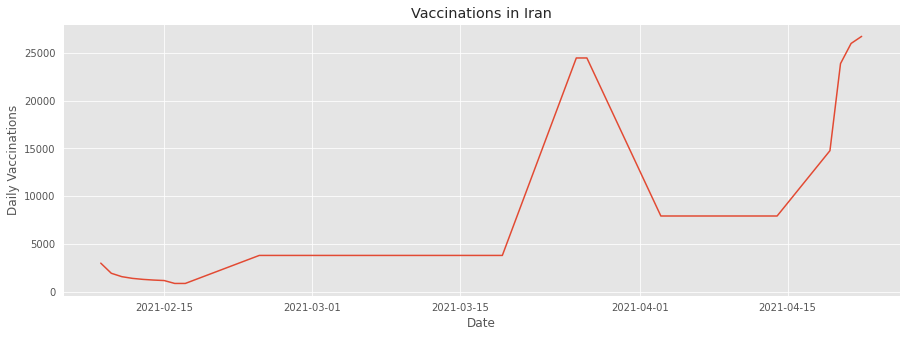

In [27]:
#daily vaccinations in Iran
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Daily Vaccinations")
plt.title("Vaccinations in Iran")
sns.lineplot(x= "date",y= "daily_vaccinations",data= df[df.country== "Iran"])
plt.show()

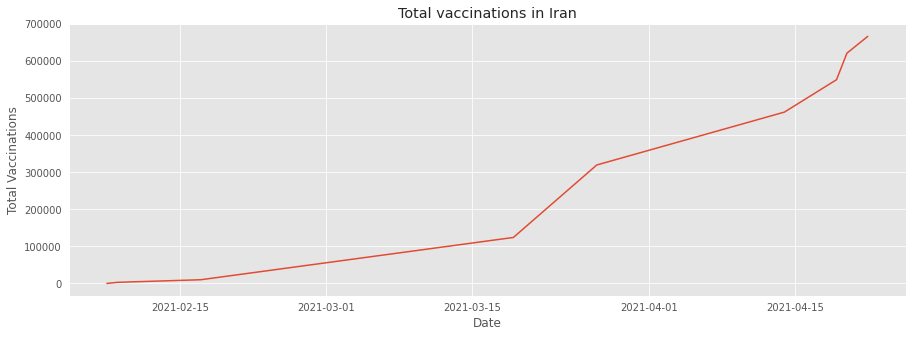

In [28]:
#Total vaccinations in Iran
plt.figure(figsize= (15,5))
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.title("Total vaccinations in Iran")
sns.lineplot(x= "date",y= "total_vaccinations",data= df[df["country"]=="Iran"])
plt.show()

In [29]:
#preferred vaccine in Iran
x= df[df["country"]=="Iran"]
z= x.vaccines.value_counts()
c= list(z.index)
c

['Oxford/AstraZeneca, Sputnik V']

In [30]:
df.groupby("country")["Total_vaccinations(count)"].mean().sort_values(ascending= False).head(10)

country
United States     218947643.0
China             211223000.0
India             132754608.0
United Kingdom     44450252.0
England            37238073.0
Brazil             35024957.0
Germany            24286909.0
Turkey             20728975.0
France             18284330.0
Indonesia          17920908.0
Name: Total_vaccinations(count), dtype: float64

In [31]:
#creating dataframe for top 5 vaccinated countries
x= df.loc[(df.country== "United States") | (df.country== "China")| (df.country== "Iran")| (df.country== "Unted Kingdom")|(df.country== "England")]

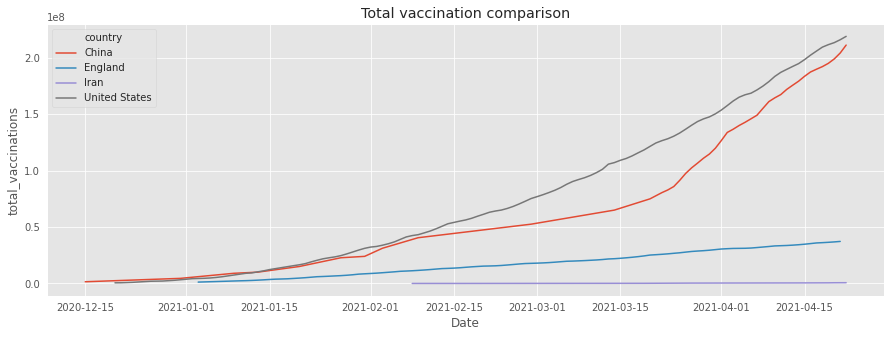

In [32]:
#total vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "total_vaccinations" ,data= x,hue= "country")
plt.xlabel("Date")
plt.title("Total vaccination comparison")
plt.show()

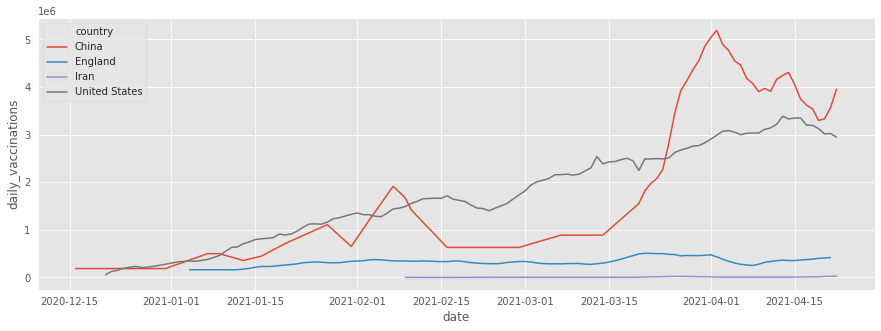

In [33]:
#daily vaccination comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations" ,data= x,hue= "country")
plt.show()

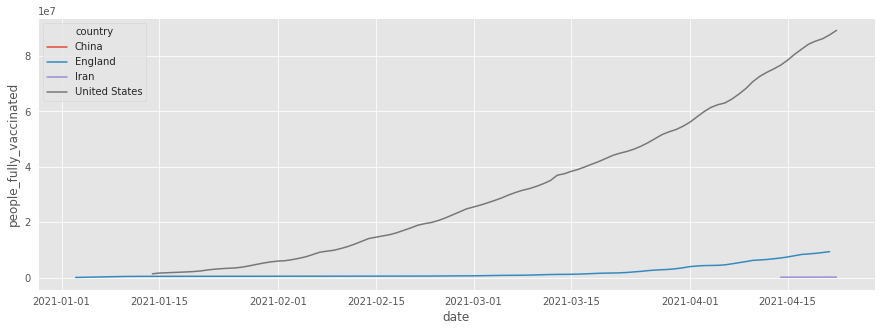

In [34]:
#full vaccinations comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "people_fully_vaccinated" ,data= x,hue= "country")
plt.show()

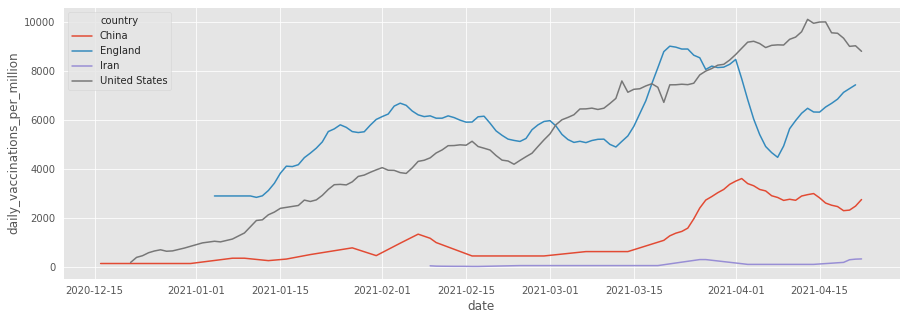

In [35]:
#daily vaccination per million comparison
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations_per_million" ,data= x,hue= "country")
plt.show()

Descriptions of features
country - The countries which are vaccinated
iso_code - Code which represents the currency of the country
date - Day of entry
iso_code - Number of vaccinations made on that day
totalvaccinated Total amount of people vaccinated in the country
people_fully_vaccinated - Number of people in the country who have two vaccinations
daily_vaccinations - Number of vaccinations on that day
total_vaccinations_per_hundred - Calculated by (total vaccinated / population) * 100
people_vaccinated_per_hundred - Calculated by (people vaccinated / population) * 100
people_fully_vaccinated_per_hundred - Calculated by (people fully vaccinated / population) * 100
daily_vaccinations_per_million - Calculated by (daily vaccinations / population) * one million
vaccines - Type of vaccine used
source_name - Source of informaiton for the vaccines
source_website - Website for source of informaiton for the vaccine

In [ ]:
df.shape

(13307, 15)

In [ ]:
cols_data = []
total_data = []
df_by_country = []
for country in np.unique(df['country']):
    df_by_country.append(df[df['country']==country])

def bars(data, x, y, title, figsize=(20, 12), rotation=75, size=8, width=None, height=None, colour=None):
    count = pd.DataFrame({x:data[x], y:data[y]}).sort_values(ascending=False, by=y)
    if not colour == None:
        c = count[colour]
    else:
        c = None
    fig = px.bar(count, x=x, y=y, title=title, width=width, height=height, color=c)
    fig.show()
    
def scatter(countries, col, threshold):
    i = 0
    fig = go.Figure()
    for country in countries:
        if list(df[df['country']==country][col])[-1]<threshold:
            if i % 2 == 0:
                i += 1
                continue
        i += 1
        df_temp = df[df['country']==country]
        trace = go.Scatter(x=df_temp['date'], y=df_temp[col], 
                           name=country,
                           mode='markers+lines')
        fig.add_trace(trace)
    fig.update_layout(legend_title=dict(text='Countries', font=dict(family="sans-serif",
                                         size=18)))
    fig.update_xaxes(title='date')
    fig.update_yaxes(title=col)
    fig.show()
    
def pie(data, x, y, title):
    data = pd.DataFrame({x:data.keys(), y:data.values()}).sort_values(ascending=False, by=y)
    fig = px.pie(data, values=y, names=x)
    fig.update_layout(legend_title=dict(text=title, font=dict(family="sans-serif",
                                         size=18)))
    fig.show()
    
def nulls(name, threshold, length):
    countries = np.array([])
    usable = 0
    for i in df_by_country:
        i = i.reset_index(drop=True)
        col = i[name]
        num_null = col.isnull().sum()
        col_len = len(col.index)
        usability = round(num_null/col_len*100, 2)<threshold
        if usability and col_len>length:
            usable += 1
            countries = np.append(countries, i['country'][0])
    return countries, name

In [ ]:
def last_item(col):
    total_vaccs = []
    for country in df_by_country:
        total_vaccs.append(np.array(country[col])[-1])
    data = dict(zip(np.unique(df['country']), total_vaccs))
    return data

def preprocess(col, x, y):
    count = Counter(df[col])
    count = pd.DataFrame({x:count.keys(), y:count.values()}).sort_values(ascending=False, by=y)
    count = dict(zip(count[x], count[y]))
    return count

def bar_pre(col, values):
    k = 0
    for i in df[col]:
        country = df['country'][k]
        for j in i.split(', '):
            if j in values:
                values[j].append(country)
        k += 1
    return values

def bar_col(name, values, colour=False):
    col_data = bar_pre(name, values)
    cols_data.append(list(col_data.keys()))
    temp = []
    for point in list(col_data.keys()):
        column = 'days using '+point
        count = Counter(col_data[point])
        data = pd.DataFrame({'countries':count.keys(), column:count.values()})
        temp.append(data)
        if colour:
            c = column
        else:
            c = None
        bars(data, 'countries', column, 'Countries who use '+point, colour=c)
    total_data.append(temp)

**Firstly, we perform an analysis to see the most popular sources.**



In [ ]:
count = Counter(df['source_name'])
count = pd.DataFrame({'name':count.keys(), 'value':count.values()})
count = count[count['value']>50]
bars(count, x='name', y='value', title='sources', width=800, height=600, colour='value')

**Secondly, we will analyse which countries have the largest amount of total vaccinations.**




In [ ]:
data = last_item('total_vaccinations')
data = pd.DataFrame({'countries':data.keys(), 'total_vaccinations':data.values()})
data = data[data['total_vaccinations']>130000]
bars(data, 'countries', 'total_vaccinations', 'total_vaccinations per country', height=1000, colour='total_vaccinations')

**Then, we take a look at how many people have been fully vaccinated twice.**


In [ ]:
data = last_item('people_fully_vaccinated')
data = pd.DataFrame({'countries':data.keys(), 'people_fully_vaccinated':data.values()})
data = data[data['people_fully_vaccinated']>50000]
bars(data, 'countries', 'people_fully_vaccinated', 'people_fully_vaccinated per country', 
     width=600, height=650, colour='people_fully_vaccinated')

**Now we turn our attention to which countries use the different vaccines.**



In [ ]:
bar_col('vaccines', {'Pfizer/BioNTech':[], 'Covaxin':[], 'Oxford/AstraZeneca':[], 
                                       'Moderna':[], 'Sinopharm/Beijing':[], 
                                        'Sinopharm/Wuhan':[], 'Sputnik V':[], 'Sinovac':[]},
       colour=True)

**Countries using sources**
Similarly, we see which countries use the different sources that provide information on COVID-19.

In [ ]:
bar_col('source_name', {'Ministry of Health':[], 'Government of the United Kingdom':[], 
                            'National Health Commission':[], 'National Health Service':[]},
       colour=True)

**Total vaccinations for US, China and UK**
Afterwards, we take a closer look at the total vaccinations for some of the leading countries; US, China and UK.

In [ ]:
for country in ['United States', 'China', 'United Kingdom']:
    df_temp = df[df['country']==country]
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_temp['date'], y=df_temp['total_vaccinations'],
                             mode='markers+lines'))
    
    fig.update_layout(title_text=country)
    fig.update_xaxes(title='Date')
    fig.update_yaxes(title='Total vaccinations')
    fig.show()

**Global vaccination progress**
Next, we analyse globally how the different nations are faring in the total, daily and full vaccinations.

In [ ]:
for i in [['total_vaccinations', 10, 15, 1000000],
          ['total_vaccinations_per_hundred', 10, 15, 11],
          ['daily_vaccinations', 2.5, 20, 200000],
          ['daily_vaccinations_per_million', 2.05, 20, 0],
          ['people_fully_vaccinated', 60, 20, 500000],
          ['people_fully_vaccinated_per_hundred', 60, 20, 4]]:
    countries, title = nulls(i[0], i[1], i[2])
    scatter(countries, title, i[3])

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

count = Counter(df['vaccines'])
count = pd.Series(count).sort_values(ascending=False)[:10]
count = dict(zip(count.keys(), count))
pie(count, 'vaccine', 'days using vaccine', '10 most used vaccine combinations')

**Vaccines used for the 5 leading countries**
Then, we visualise the various vaccines used by the five leading countries.

Please note that the "Days using vaccines" label only shows how many days are included in the dataset, not representing the total amount per country in real time.

In [ ]:
countries = ['United States', 'China', 'United Kingdom', 'India', 'Israel']
results = [[], []]
for country in countries:
    count = Counter(df[df['country']==country]['vaccines'])
    result = pd.DataFrame({'Vaccines':count.keys(), 'Days using vaccines':count.values()})
    pie(count, 'Vaccines', 'Days using vaccines', country)

In [ ]:
df['year'] = [int(i.split('-')[0]) for i in df['date']]
df['month'] = [int(i.split('-')[1]) for i in df['date']]
df['day'] = [int(i.split('-')[2]) for i in df['date']]

for col in df:
    df[col] = df[col].fillna(0)

Correlation
The final visualisation is checking out the correlation for each feature in our dataset.

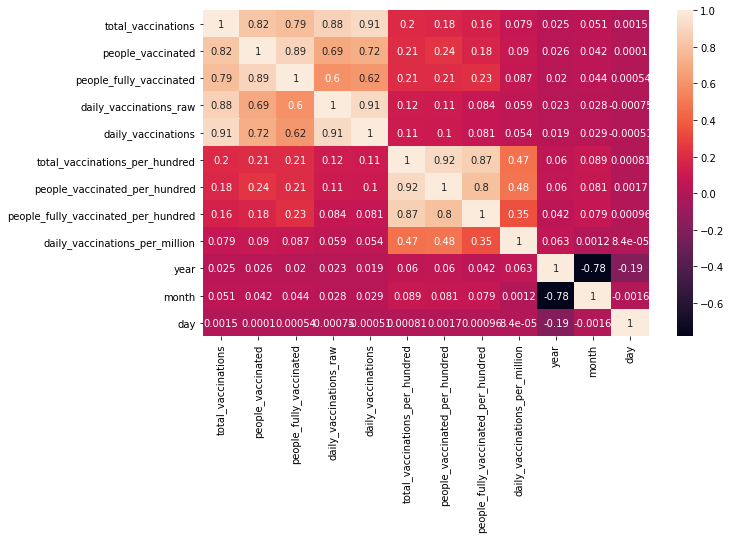

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

**Predicting total vaccinations**


In [ ]:
X = df.drop(['total_vaccinations', 'people_vaccinated', 'iso_code', 'date', 'source_website'], axis=1)
y = df['total_vaccinations']
X = X.merge(pd.get_dummies(X['source_name']), left_index=True, right_index=True).drop('source_name', axis=1)
X = X.merge(pd.get_dummies(X['vaccines']), left_index=True, right_index=True).drop('vaccines', axis=1)
X = X.drop('country', axis=1)

The last thing we will do is using machine learning models to predict the "total_vaccinations" feature using the other variables in our data.

The predictors we will use are XGBoost, Random Forest, Elastic Net, Lasso, Ridge and SVR.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_names = ['XGBRegressor', 'RandomForestRegressor', 'ElasticNet', 'Lasso', 'Ridge', 'SVR']
score_list = []
r2_list = []
mae_list = []
mse_list = []

for model in [XGBRegressor(), RandomForestRegressor(), ElasticNet(), Lasso(), Ridge(), SVR()]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    score = model.score(X_test, y_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    score_list.append(score)
    r2_list.append(r2)
    mae_list.append(mae)
    mse_list.append(mse)

[10:38:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.285786203826662e+16, tolerance: 196297870153689.4

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning:

Ill-conditioned matrix (rcond=5.36827e-18): result may not be accurate.



Here we can evaluate the performance of the different algorithms.



In [ ]:
results = pd.DataFrame({'score':score_list, 'r2':r2_list, 'mae':mae_list, 'mse':mse_list})
results.index = model_names
for col in results:
    temp_results = results.sort_values(by=col, ascending=False)
    fig = px.bar(temp_results, temp_results.index, col,
                 title=col, color=results[col])
    fig.show()